In [1]:
from pandas import DataFrame, Index, read_csv
import pandas as pd
from helpers.dslabs_functions import (
    select_low_variance_variables,
    study_variance_for_feature_selection,
    apply_feature_selection,
    select_redundant_variables,
    study_redundancy_for_feature_selection,
    HEIGHT, evaluate_approach, plot_multiline_chart
)
from math import ceil
from matplotlib.pyplot import savefig, show, figure

In [2]:
df = pd.read_csv('../../datasets/prepared/class_pos_covid_outliers_iqr.csv')
df = df.dropna()

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
train, test = train_test_split(df, train_size=0.7)

In [5]:
target = "CovidPos"
file_tag = "CovidPos"

print("Original variables", df.columns.to_list())
vars2drop: list[str] = select_low_variance_variables(train, 3, target=target)
print("Variables to drop", vars2drop)

Original variables ['Unnamed: 0.1', 'Unnamed: 0', 'Sex', 'GeneralHealth', 'PhysicalHealthDays', 'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus', 'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory', 'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers', 'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'HighRiskLastYear', 'CovidPos', 'Latitude', 'Longitude']
Variables to drop ['Sex', 'GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 'HadDepressiveDisorder', 'HadKidneyDisease'

FileNotFoundError: [Errno 2] No such file or directory: 'images/CovidPos_fs_low_var_recall_study.png'

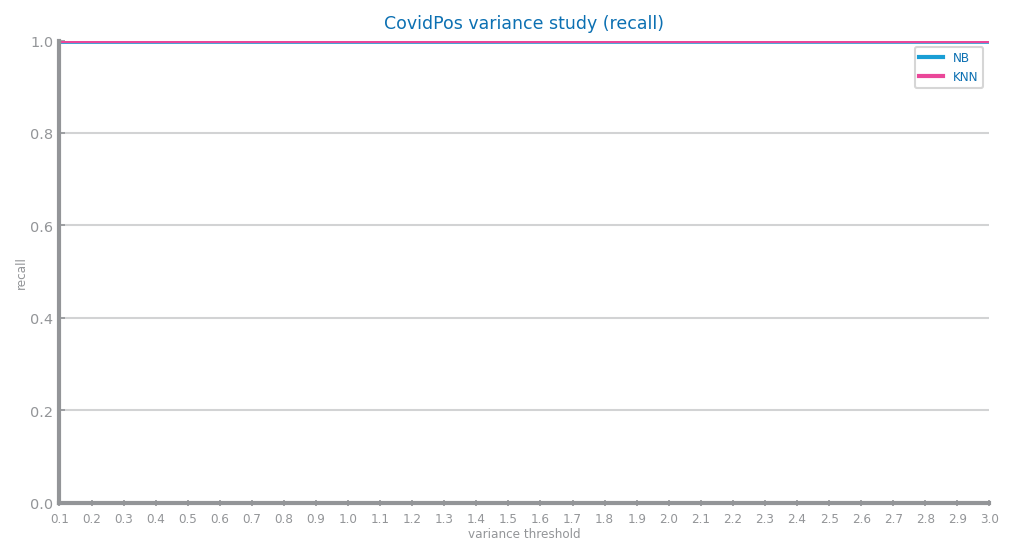

In [6]:
eval_metric = "recall"

figure(figsize=(2 * HEIGHT, HEIGHT))
study_variance_for_feature_selection(
    train,
    test,
    target=target,
    max_threshold=3,
    lag=0.1,
    metric=eval_metric,
    file_tag=file_tag,
)
show()